# Introduction

Analyze the annual returns in each sector

# Setup

In [1]:
%cd ..

/workspaces/bm_sector_rotation


# Libraries

In [2]:
import pandas as pd
from pathlib import Path

# Data

In [3]:
p = Path('./data')
dfs = [pd.read_parquet(f) for f in p.glob('*.parquet')]
len(dfs)

14

# Analysis

In [4]:
def extract_index(index_name):
    return [df for df in dfs if df['name'][0] == index_name][0]

In [5]:
def calculate_annual_index_return(data):
    index_name = data['name'][0]
    df = data.groupby(by=data.index.year).agg({'close': ['min', 'max', 'idxmin', 'idxmax']})
    df[index_name] = (df[('close', 'max')]/df[('close', 'min')] - 1) * 100
    df[index_name] = df[index_name].round(2)

    max_is_later_than_min = df[('close', 'idxmax')] - df[('close', 'idxmin')] > pd.Timedelta('0 days')
    df.loc[~ max_is_later_than_min, index_name] = -1 * df.loc[~ max_is_later_than_min, index_name]

    return df[[index_name]]

In [6]:
annual_returns = pd.concat([calculate_annual_index_return(df) for df in dfs],
          axis = 1)

annual_returns.T

,date,2016,2017,2018,2019,2020,2021
CONSTRUCTION,,9.36,20.15,-121.49,47.40,-74.35,-11.99
CONSUMER PRODUCTS & SERVICES,,-7.98,12.28,-17.22,-11.01,-41.12,7.06
ENERGY,,NaN,NaN,-49.93,55.33,-151.34,22.80
FBMKLCI,,-7.00,9.86,-15.89,-11.57,38.11,-5.08
FINANCIAL SERVICES,,-7.73,18.19,-13.33,-19.72,47.41,-5.49
HEALTH CARE,,NaN,NaN,7.83,-7.58,290.06,-17.17
INDUSTRIAL PRODUCTS & SERVICES,,-8.84,21.40,-13.88,-17.13,93.39,10.86
PLANTATION,,-8.58,-5.98,-25.43,20.04,-41.18,-5.43
PROPERTY,,-8.67,17.72,-44.75,-29.02,-67.95,-8.93
REIT,,NaN,8.29,-15.53,9.66,-25.63,-4.85


<AxesSubplot:xlabel='date'>

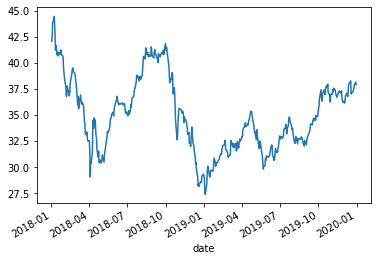

In [7]:
extract_index("TECHNOLOGY").loc['2018':'2019']['close'].plot()